# NSCI 801 - Quantitative Neuroscience
## Bayesian statistics and hypothesis testing
Gunnar Blohm

### Motivation and pitfalls of classic methods
Frequentist statistics assumptions:
* parameters are unknown but **fixed**
* uncertainty is in the **sample** based on the idea of infinite repeated sampling
* **ignores** prior knowledge

Bayesian alternative assumptions:
* parameters are unknown and therefore **random**
* uncertainty is the probability **distribution of the population parameter**
* explicitly **includes** prior knowledge

Pragmatically, sometimes it makes sense to use frequentist approach, sometimes it makes sense to use Bayesian approach, sometimes it's best to provide both!

### Motivation and pitfalls of classic methods
So what do Bayesian stats buy you?
* incorporates background knowledge (frequentists stats test the same Null Hyp. over and over again)
* you expect something is going on if you did this experiment / analysis $\rightarrow$ Null Hyp. (= "nothing is going on") is often a bad starting point 
* allows to explicitly carry out replication analyses (due to integration of background) $\rightarrow$ plausibility of previous research findings can be evaluated in the light of new data
* gives you the probability of the (Null) Hyp.


### Conditional probabilities and Bayes rule
$$ P(a,b) = P(a|b) P(b) = P(b|a) P(a)$$
Rearranging, results in:
$$ P(a|b) = \frac{P(b|a)P(a)}{P(b)}$$
With:
$$ P(b) = \sum_{j} P(b|a_j)P(a_j) $$

### Bayes rule example
<img style="float: center; width:500px;" src="stuff/Cancer_cond_prob.png">

$$P(cancer | test+) = \frac{P(test+ | cancer) P(cancer)}{P(test+)}$$

$$P(cancer | test+) = \frac{9/10 * 10/1000}{9/10 * 10/1000 + 99/990 * 990/1000} = 9/108 = 8.3 \% $$

### Bayesian integration with uncertainty
$$ P(a|b) = \frac{P(b|a)P(a)}{P(b)}$$
<img style="float: center; width:600px;" src="stuff/Bayes-distributions.png">

### Bayes Factor
**A general method for hypothesis testing!**

Let's start with data ($\mathbf{D}$), assumed to have arisen under one of two hypotheses $H_1$ or $H_2$, according to $P(\mathbf{D}|H_1)$ and $P(\mathbf{D}|H_2)$. Then we can compute the posterior:

$$P(H_k|\mathbf{D}) = \frac{P(\mathbf{D}|H_k) P(H_k)}{P(\mathbf{D}|H_1) P(H_1) + P(\mathbf{D}|H_2) P(H_2)}$$

What we really want to know is the odds that the data is more sonsistent with $H_1$ than with $H_2$.(reminder: odds = probability / (1-probability)). We thus want to know:

$$\frac{P(H_1|\mathbf{D})}{P(H_2|\mathbf{D})} = \frac{P(\mathbf{D}|H_1)}{P(\mathbf{D}|H_2)} \frac{P(H_1)}{P(H_2)} = B_{21} \frac{P(H_1)}{P(H_2)}$$

where $B_{12}$ is the Bayes Factor, i.e. the ratio of posterior odds **regardless** of the value of  the prior odds!


### Bayes Factor
**A general method for hypothesis testing!**

Bayes Factor (BF) is a quantity for the evidence in observed data to support one model (or hypothesis) against another, where the two models are usually a “null” ($H_1$) vs an “alternative” ($H_2$).

Sometimes a **Bayesian p-value** is computed as:
$$\frac{P(\mathbf{D}|H_1)}{P(\mathbf{D}|H_1) + P(\mathbf{D}|H_2)}$$

### Bayes factor example
Coin flipping example. Suppose you flip a coin 100 times. Joe believes the coin is uneven and that heads have a 75% probability. Gunnar believes it's even. After 100 tosses, the coin lands 62 heads. Is it an uneven coin?

$H_1$: even coin

$H_2$: uneven coin with $P(heads)=0.75$

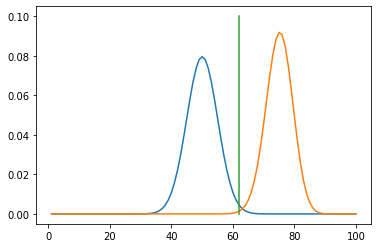

In [17]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

N = 100 # number coin flips

x = np.linspace(1, N, N)
dist1 = binom(N, 0.5) # Gunnar's belief
dist2 = binom(N, 0.75) # Joe's belief
toss = 62

plt.plot(x, dist1.pmf(x))
plt.plot(x, dist2.pmf(x))
plt.plot([toss, toss],[0, 0.1])

In [21]:
# compute Bayes Factor
toss = 62
joe = dist2.pmf(toss)
gunnar = dist1.pmf(toss)

print("BF = ", gunnar/joe)
print("Bayesian p-value = ", gunnar/(joe+gunnar))

BF =  3.3226284070273113
Bayesian p-value =  0.7686592725911169


### Bayes Factor
**Interpretation**

<img style="float: center; width:500px;" src="stuff/BF-interpr.png">

### Bayes Factor
Unfortunately, in real life things are usually more complicated...

e.g. $H_1$: even coin; $H_2$: uneven coin (any probability)

Now we have to compute the following:
$$B = \frac{\int_{\Theta_1} P(X| \theta) P(\theta | H_1) d \theta}{\int_{\Theta_2} P(X| \theta) P(\theta | H_1) d \theta}$$

### Bayes Factor (& other Bayesian stats)
Practically, there are easier ways to do this than in Python...
* [JASP](https://jasp-stats.org/)
* [Bayesian Inference in R](https://cran.r-project.org/web/views/Bayesian.html)

If you want to use Python (totally possible)
* call R packages from Python with [rpy2](https://rpy2.readthedocs.io/en/latest/)
* use [PyMC3](https://docs.pymc.io/)
* use [PyStan](https://mc-stan.org/users/interfaces/pystan)


### Maximum a posteriori (MAP) estimation
Goal: we want to estimate an unobserved population parameter $\theta$. Then we can compute the write the probability of observing data $D$ for a given population paprameter $\theta$ as: $P(D| \theta)$

This is the likelihood of the data given the model and we use this directly to estimate $\theta$ through maximum likelihood estimation (MLE):
$$\hat{\theta}_{MLE}=\underset{\theta}{\operatorname{argmax}} P(D| \theta)$$

But if a prior distribution over $\theta$ exists, then we can include that to compute the posterior:
$$\hat{\theta}_{MAP}=\underset{\theta}{\operatorname{argmax}} P(D| \theta) P(\theta)$$
Note: we have not included the marginal because it is independent of $\theta$ and thus just a scaling constant...

**More about this in next class!**

### Bayesian ANOVA
The idea is again that we use ANOVA for model (hypothesis) comparison.

Supposed you have 2 fixed factors A and B. Then a Bayesian ANOVA will test the following models:
* the null model
* the model with a main effect of A
* the model with a main effect of B
* the model with a main effect of A and a main effect of B
* the model with a main effect of A, a main effect of B, and an interaction between A and B




### Bayesian ANOVA
Bayesian ANOVAs will compute the Bayes Factor and use the priors to extimate the posterior model probabilities. 

ANOVA-based Bayes Factors typically use the best model as a reference

This is easy to do / interpret with [JASP](https://jasp-stats.org/)